In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
import seaborn as sns

In [2]:
#one-way anova
s1 = np.array([3,4,5])
s2 = np.array([6,6])
s3 = np.array([7,8,9])

In [3]:
fstat,pval = stats.f_oneway(s1,s2,s3)
print(fstat,pval)

15.0 0.007713560673657698


In [4]:
fcrit = stats.f.isf(0.05,2,5)
fcrit

5.786135043349964

In [5]:
pvalue = stats.f.sf(fstat,2,5)
pvalue

0.007713560673657698

In [6]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [7]:
df = pd.DataFrame({'Yield':[3,4,5,6,6,7,8,9], 'Soil':['S1','S1','S1','S2','S2','S3','S3','S3'], 'Treatment':['NF','CF','OF','NF','CF','NF','CF','OF']})
df

,Yield,Soil,Treatment
0,3,S1,NF
1,4,S1,CF
2,5,S1,OF
3,6,S2,NF
4,6,S2,CF
5,7,S3,NF
6,8,S3,CF
7,9,S3,OF


In [8]:
model = ols('Yield~Soil',data=df).fit()
anova_tabe = anova_lm(model)
anova_tabe

,df,sum_sq,mean_sq,F,PR(>F)
Soil,2.0,24.0,12.0,15.0,0.007714
Residual,5.0,4.0,0.8,NaN,NaN


In [9]:
#two-way anova
model = ols('Yield~Soil+Treatment',data=df).fit()
anova_tabe = anova_lm(model)
anova_tabe

,df,sum_sq,mean_sq,F,PR(>F)
Soil,2.0,24.000000,12.000000,108.0,0.001603
Treatment,2.0,3.666667,1.833333,16.5,0.024056
Residual,3.0,0.333333,0.111111,NaN,NaN


In [10]:
df1 = pd.read_csv('bank.csv')
df1

,User I.D,Age,Income,Income2,Deposit,Deposit2,Customer_type,Deposit_Scheme
0,ACX570081,26,32900,20230,14805.0,11935.7,Irregular,Hal-Yearly
1,ACX570082,43,37390,21410,19442.8,10276.8,Regular,Quaterly
2,ACX570083,35,11300,22290,5989.0,9361.8,Irregular,Monthly
3,ACX570084,27,41680,26970,19589.6,15912.3,Irregular,Quaterly
4,ACX570085,42,27170,27220,14943.5,11160.2,Regular,Quaterly
...,...,...,...,...,...,...,...,...
259,ACX570326,28,35350,22240,15907.5,9785.6,Irregular,Yearly
260,ACX570327,36,21500,34410,10535.0,17893.2,Regular,Quaterly
261,ACX570328,25,27840,24250,16425.6,10427.5,Irregular,Quaterly
262,ACX570329,36,38530,26800,18494.4,11256.0,Regular,Quaterly


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User I.D        264 non-null    object 
 1   Age             264 non-null    int64  
 2   Income          264 non-null    int64  
 3   Income2         264 non-null    int64  
 4   Deposit         264 non-null    float64
 5   Deposit2        264 non-null    float64
 6   Customer_type   264 non-null    object 
 7   Deposit_Scheme  264 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 16.6+ KB


In [12]:
df1['Customer_type'].unique()

array(['Irregular', 'Regular'], dtype=object)

In [13]:
df1['Deposit_Scheme'].unique()

array(['Hal-Yearly', 'Quaterly', 'Monthly', 'Yearly'], dtype=object)

In [14]:
df1.describe()

,Age,Income,Income2,Deposit,Deposit2
count,264.000000,264.000000,264.000000,264.000000,264.000000
mean,35.143939,30104.583333,25014.545455,15601.345076,12915.172348
std,6.045622,9383.489941,5079.402956,5184.112352,3038.508903
min,16.000000,5110.000000,11200.000000,2606.100000,5104.000000
25%,31.000000,24207.500000,21797.500000,11934.975000,10554.575000
50%,35.000000,30360.000000,25160.000000,15561.100000,12881.200000
75%,39.000000,36132.500000,28532.500000,19049.375000,15140.825000
max,49.000000,57000.000000,38300.000000,31920.000000,21065.000000


In [15]:
df1.corr()

,Age,Income,Income2,Deposit,Deposit2
Age,1.000000,-0.033028,0.005136,0.024369,-0.010042
Income,-0.033028,1.000000,-0.121455,0.908407,-0.094631
Income2,0.005136,-0.121455,1.000000,-0.119572,0.797276
Deposit,0.024369,0.908407,-0.119572,1.000000,-0.091559
Deposit2,-0.010042,-0.094631,0.797276,-0.091559,1.000000


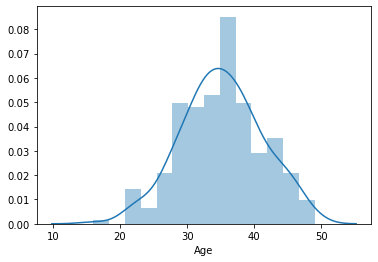

In [16]:
sns.distplot(df1['Age'])

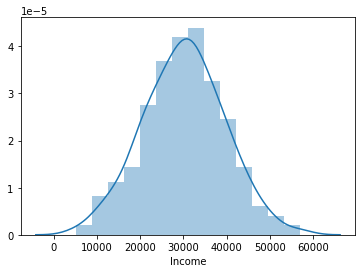

In [18]:
sns.distplot(df1['Income'])

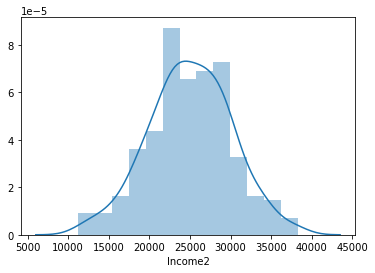

In [20]:
sns.distplot(df1['Income2'])

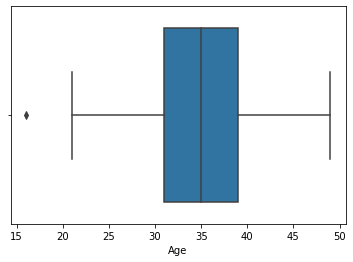

In [23]:
sns.boxplot(df1['Age'])

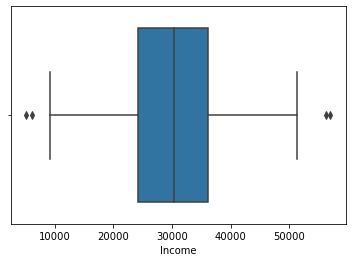

In [24]:
sns.boxplot(df1['Income'])

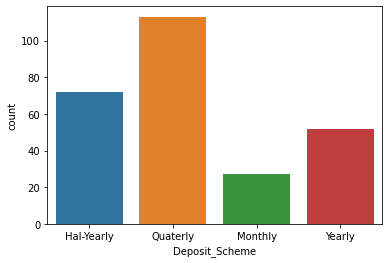

In [25]:
sns.countplot(df1['Deposit_Scheme'])

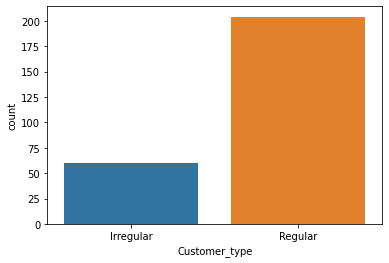

In [26]:
sns.countplot(df1['Customer_type'])

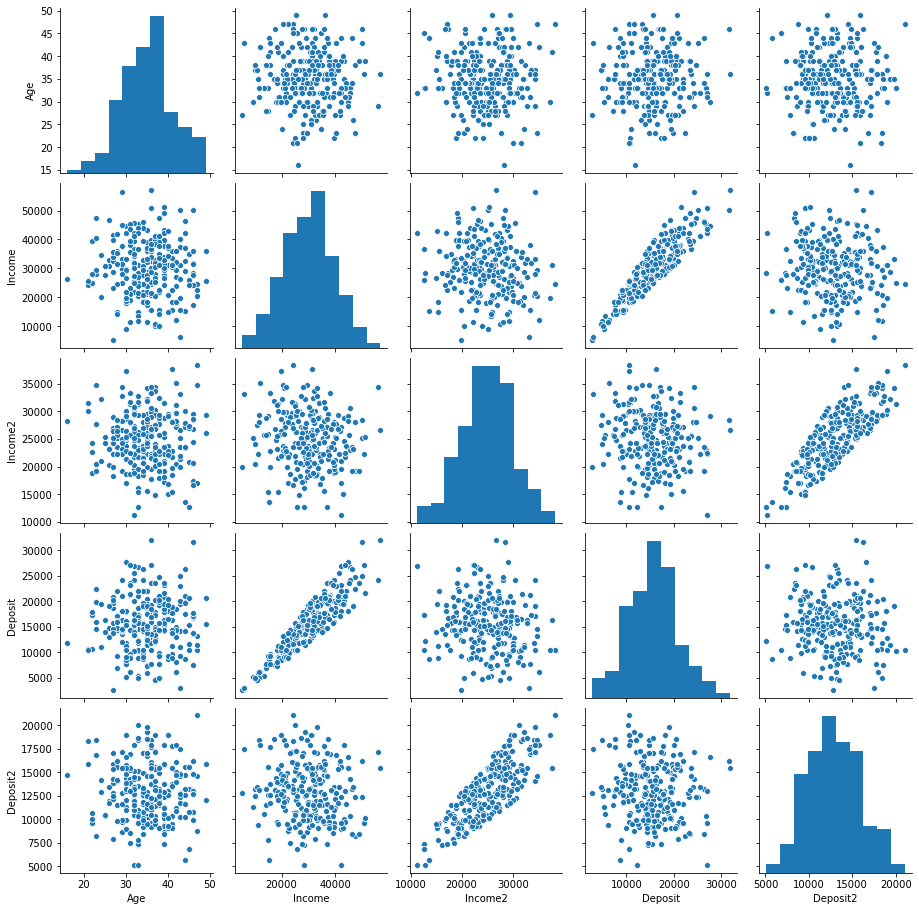

In [28]:
sns.pairplot(df1)

In [29]:
# prob1: is income depends on age?
# prob2: is deposit depends on age?
# prob3: is income differs customer_type?
# prob4: is deposit differs custpmer_type?
# prob5: is deposit depends on deposit_scheme?

## prob1: is income depends on age?
H0 : no correlation between  income and age

H1 : there is a correlation between income and age


In [30]:
stats.pearsonr(df1['Age'],df1['Income'])

(-0.03302834437595372, 0.5931710919753351)

In [31]:
stats.pearsonr(df1['Age'],df1['Income2']) # result = r-value , p-value

(0.005135713517060235, 0.9338117429499324)

In [32]:
# r = cov(x,y) / sigmax*sigmay
# r = -0.25 to +0.25 weak correlation
# r = 0.25 to 0.75 or -0.25 to -0.75 Moderate correlation
# r = 0.75 to 1 or -0.75 to -1 - Highly correlation

In [33]:
stats.pearsonr(df1['Deposit'],df1['Income'])

(0.9084069737443043, 3.203484468929459e-101)

In [34]:
## prob2: is deposit depends on age?
stats.pearsonr(df1['Age'],df1['Deposit'])

(0.024368753624101756, 0.6934886952134331)

In [35]:
# prob3: is income differs customer_type?
# two sample independent t test

In [36]:
# test of normality for income
stats.shapiro(df1['Income'])

ShapiroResult(statistic=0.9979685544967651, pvalue=0.9867026805877686)

In [41]:
regular = df1[df1['Customer_type']=='Regular']['Income']
irregular = df1[df1['Customer_type']=='Irregular']['Income']
print(stats.shapiro(regular),stats.shapiro(irregular))


ShapiroResult(statistic=0.9975496530532837, pvalue=0.9886366724967957) ShapiroResult(statistic=0.9936540126800537, pvalue=0.9891098141670227)


In [42]:
#test of variance equality
stats.levene(regular,irregular)

LeveneResult(statistic=1.0119180503839345, pvalue=0.31537190425338973)

In [43]:
#H0: mu_regular = mu_irregular
#H1: mu_regular != mu_irregular
stats.ttest_ind(regular,irregular)

Ttest_indResult(statistic=0.2811492874726788, pvalue=0.7788178055635818)

In [44]:
regular = df1[df1['Customer_type']=='Regular']['Deposit']
irregular = df1[df1['Customer_type']=='Irregular']['Deposit']
print(stats.shapiro(regular),stats.shapiro(irregular))

ShapiroResult(statistic=0.9921794533729553, pvalue=0.3464764654636383) ShapiroResult(statistic=0.9934472441673279, pvalue=0.9869619011878967)


In [45]:
stats.levene(regular,irregular)

LeveneResult(statistic=0.17465867314099043, pvalue=0.6763465654344156)

In [46]:
stats.ttest_ind(regular,irregular)

Ttest_indResult(statistic=0.7494656161430324, pvalue=0.45424901053004874)

In [50]:
regular = df1[df1['Customer_type']=='Regular']['Age']
irregular = df1[df1['Customer_type']=='Irregular']['Age']
print(stats.shapiro(regular),stats.shapiro(irregular))  # pvalue is very low it fails the normality test so we have to go for non paremetric test

ShapiroResult(statistic=0.9734551906585693, pvalue=0.0006648614653386176) ShapiroResult(statistic=0.8703910708427429, pvalue=1.2869782040070277e-05)


In [52]:
# H0: pop.median of regular age = pop.median of irregular age
# H1: pop.median of regular age != pop.median of irregular age

In [51]:
#Since regular and irregular age distributions are not normal
# Hence go for non parametric (Mannwhitneyu)
stats.mannwhitneyu(regular,irregular)

MannwhitneyuResult(statistic=2304.0, pvalue=9.970672920662078e-14)

In [59]:
# prob5: is deposit depends on deposit_scheme?
monthly = df1[df1['Deposit_Scheme']=='Monthly']['Deposit']
half = df1[df1['Deposit_Scheme']=='Hal-Yearly']['Deposit']
quarterly = df1[df1['Deposit_Scheme']=='Quaterly']['Deposit']
yearly = df1[df1['Deposit_Scheme']=='Yearly']['Deposit']
stats.shapiro(monthly)

ShapiroResult(statistic=0.9331264495849609, pvalue=0.08247808367013931)

In [55]:
stats.shapiro(half)

ShapiroResult(statistic=0.9761090874671936, pvalue=0.18678654730319977)

In [60]:
stats.shapiro(quarterly)

ShapiroResult(statistic=0.962395429611206, pvalue=0.002900417661294341)

In [61]:
stats.shapiro(yearly)

ShapiroResult(statistic=0.9884920120239258, pvalue=0.8936530947685242)

In [63]:
stats.levene(monthly,half,quarterly,yearly)

LeveneResult(statistic=11.873687833979027, pvalue=2.592568408322369e-07)

In [64]:
# Since quarterly is not following normality  and variance is also not met, hence perform non parametric

In [ ]:
# H0: pop.median of deposit of deposit_scheme = pop.median of deposit of deposit_scheme
# H1: pop.median of deposit of deposit_scheme != pop.median of deposit of deposit_scheme

In [65]:
stats.kruskal(monthly,half,quarterly,yearly) # reject H0

KruskalResult(statistic=60.24338889144385, pvalue=5.214907322282685e-13)

In [66]:
#post hoc analysis (tukey HSD for parametric , conover for non parametric)

In [68]:
from statsmodels.stats.multicomp import tukeyhsd,pairwise_tukeyhsd

In [69]:
pairwise_tukeyhsd(df1['Deposit'],df1['Deposit_Scheme']).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Hal-Yearly,Monthly,-5822.5472,0.001,-8407.8468,-3237.2476,True
Hal-Yearly,Quaterly,-542.3653,0.8297,-2269.8802,1185.1496,False
Hal-Yearly,Yearly,4421.7235,0.001,2336.8278,6506.6192,True
Monthly,Quaterly,5280.1819,0.001,2826.1267,7734.2371,True
Monthly,Yearly,10244.2707,0.001,7526.7591,12961.7823,True
Quaterly,Yearly,4964.0888,0.001,3044.3485,6883.8292,True


In [71]:
# Is there any assciation between customer_type and deposit_scheme

#H0: There is no association between them
#H1: There is an association between them

In [72]:
table = pd.crosstab(df1['Customer_type'],df1['Deposit_Scheme'])

In [73]:
stats.chi2_contingency(table)

(2.5601362063621305,
 0.4645210818775648,
 3,
 array([[16.36363636,  6.13636364, 25.68181818, 11.81818182],
        [55.63636364, 20.86363636, 87.31818182, 40.18181818]]))